II. Programming

Francisco Silva (110409) and Joana Cardoso (109864)

1)

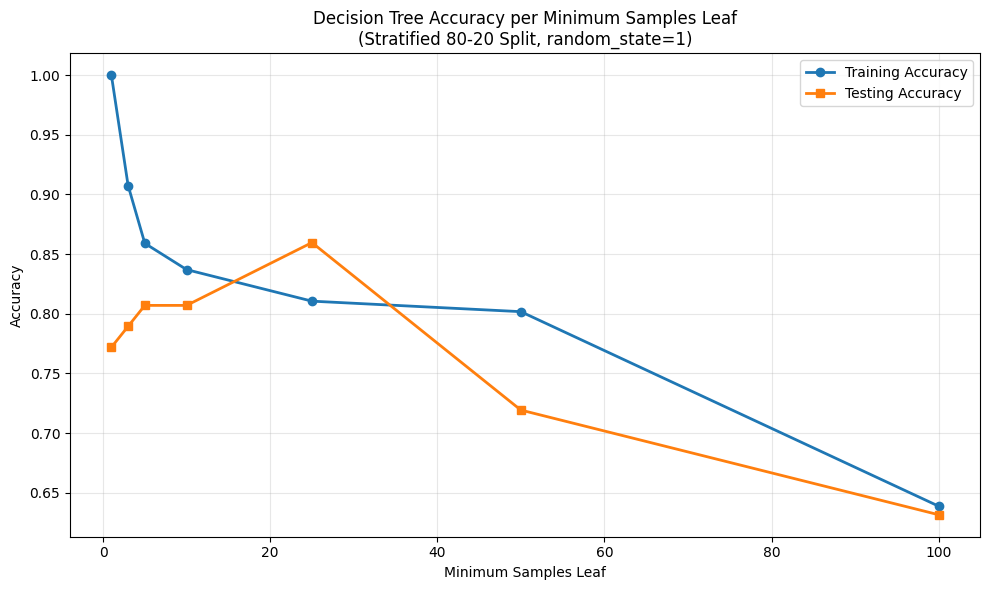

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv("hungarian_heart_diseases.csv")

# Prepare features and target (using last column as target)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Stratified 80-20 split with random_state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Define minimum sample leaf values to test
min_samples_leaf_values = [1, 3, 5, 10, 25, 50, 100]

# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []

# Train and evaluate decision trees for each min_samples_leaf value
for min_samples_leaf in min_samples_leaf_values:
    # Create decision tree classifier
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=1)

    # Fit the model
    dt.fit(X_train, y_train)

    # Calculate and store accuracies
    train_acc = accuracy_score(y_train, dt.predict(X_train))
    train_accuracies.append(train_acc)
    test_acc = accuracy_score(y_test, dt.predict(X_test))
    test_accuracies.append(test_acc)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, train_accuracies, 'o-', label='Training Accuracy', linewidth=2)
plt.plot(min_samples_leaf_values, test_accuracies, 's-', label='Testing Accuracy', linewidth=2)
plt.xlabel('Minimum Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy per Minimum Samples Leaf\n(Stratified 80-20 Split, random_state=1)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

2.
The decision tree achieves very high training accuracy when the minimum leaf is small (1, 3), however the testing accuracy is noticeably lower, which indicates strong overfitting and poor generalization. Meaning that the model learns the training data too closely, so it performs well on training but poorly on unseen data.

As the minimum leaf size increases to moderate values (5, 10, 25), the gap between training and testing accuracy gets smaller, and the testing accuracy improves, suggesting that the model is generalizing better.

When it becomes too large (50, 100), both training and testing accuracies drop substantially, this behavior shows that the model is now too simple to capture the underlying patterns, leading to underfitting, which implies poor performance on both training and testing data.

In summary, the results demonstrate that very small leaf sizes cause overfitting and very large leaf sizes cause underfitting. Intermediate values show the best balance between model complexity and generalization capacity.

3.1

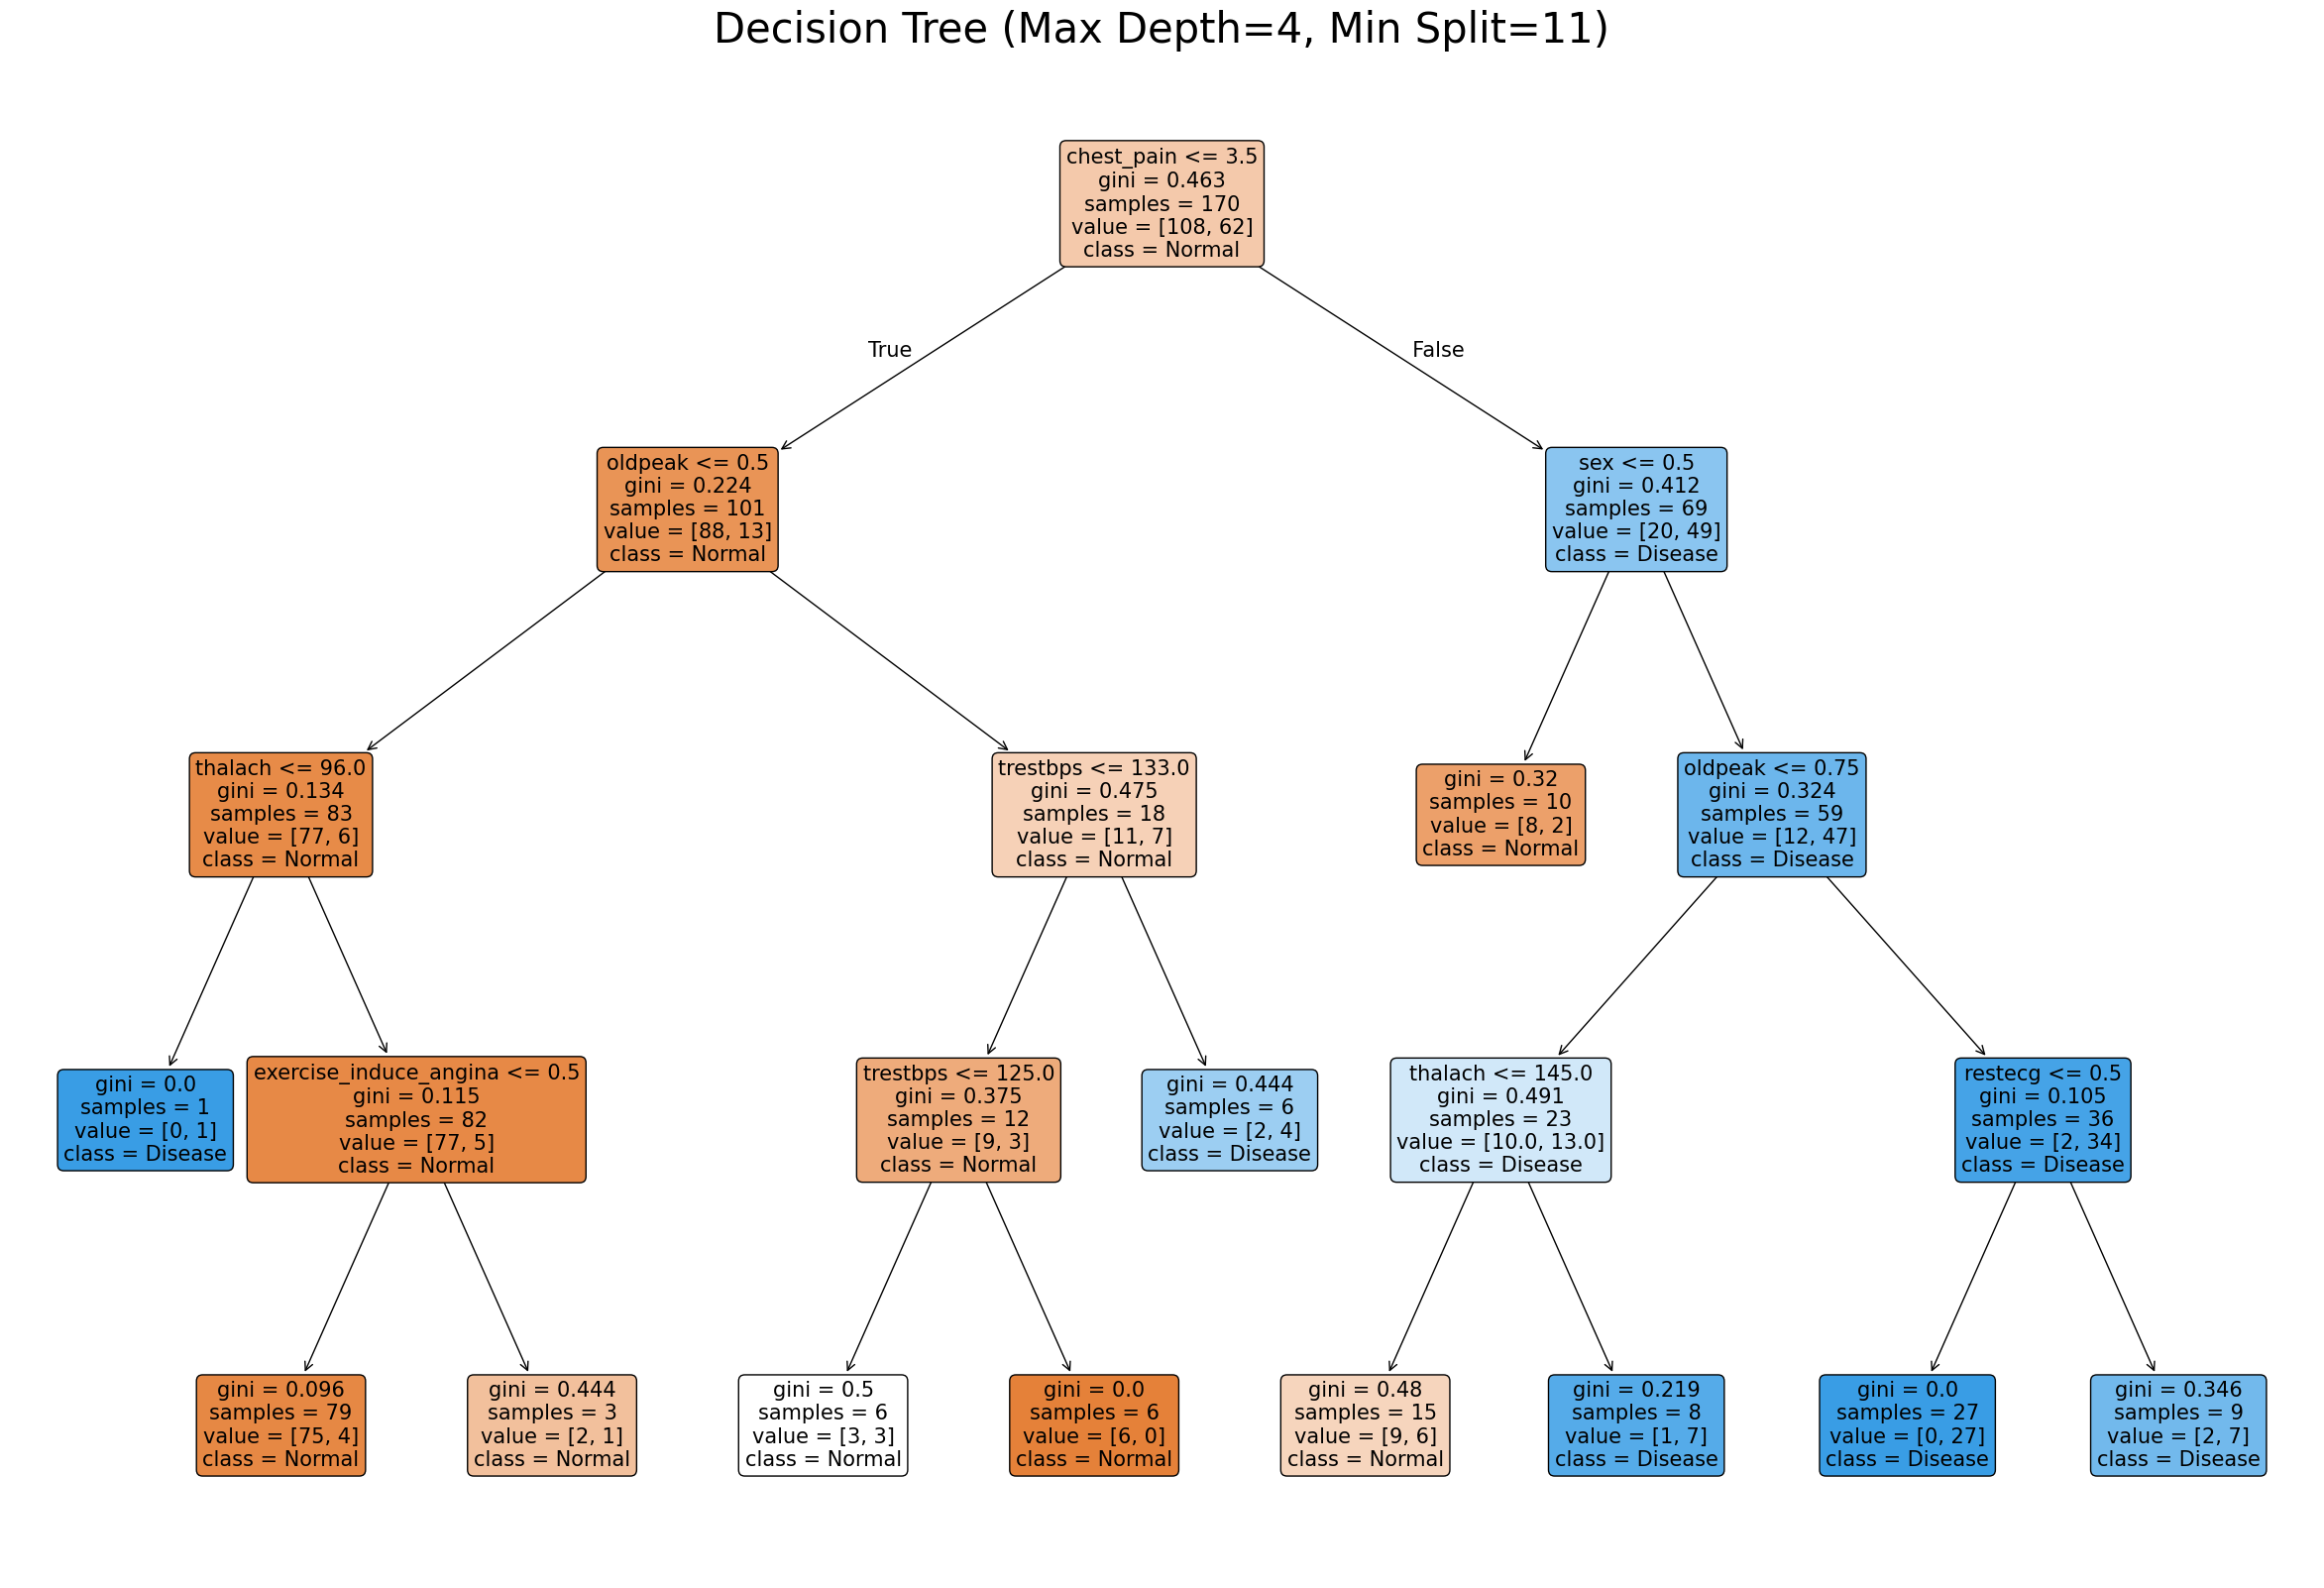

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('hungarian_heart_diseases.csv')

X = df.drop('outcome', axis=1)
y = df['outcome']

# Split into Training (60%) and Temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

# Split Temp into Validation (20%) and Testing (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1, stratify=y_temp)

# Hyperparameter ranges
max_depth_range = list(range(2, 5))
min_samples_split_range = list(range(2, 101))


best_model = None
best_params = {}

for depth in max_depth_range:
    for min_split in min_samples_split_range:
        # Initialize and train model
        dtc = DecisionTreeClassifier(
            max_depth=depth,
            min_samples_split=min_split,
            random_state=1
        )
        dtc.fit(X_train, y_train)

        # Evaluate on Validation set
        y_val_pred = dtc.predict(X_val)
        val_acc = accuracy_score(y_val, y_val_pred)

        # Evaluate on Test set
        y_test_pred = dtc.predict(X_test)
        test_acc = accuracy_score(y_test, y_test_pred)

        # Check for the first model that meets the required criteria
        if val_acc >= 0.8 and test_acc >= 0.785 and best_model is None:
            best_model = dtc
            best_params = {
                'max_depth': depth,
                'min_samples_split': min_split,
                'val_accuracy': val_acc,
                'test_accuracy': test_acc
            }
            break
    if best_model is not None:
        break

plt.figure(figsize=(30, 20))
feature_names = X.columns.tolist()
class_names = ['Normal', 'Disease']

plot_tree(best_model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, proportion=False, fontsize=15)

plt.title(f"Decision Tree (Max Depth={best_params['max_depth']}, Min Split={best_params['min_samples_split']})", fontsize=30)
plt.show()

3.2

Based on the graph, we obtain the following results:

Disease conditions (with their associated posterior probabilities):
- chest_pain <= 3.5 ; oldpeak <= 0.5; thalach <= 96.0 (100%) 
- chest_pain <= 3.5 ; oldpeak > 0.5; trestbps > 133.0 (66.7%)
- chest_pain > 3.5 ; sex > 0.5 ; oldpeak <= 0.75; thalach > 145 (87.5%)
- chest_pain > 3.5 ; sex > 0.5 ; oldpeak > 0.75; restecg <= 0.5 (100%)
- chest_pain > 3.5 ; sex > 0.5 ; oldpeak > 0.75; restecg > 0.5 (77.8%)